# Análise Exploratória dos Dados

In [226]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import numpy as np

In [227]:
caminho_arquivo = Path(r'C:\Users\alexa\OneDrive\Área de Trabalho\projeto_a3\dados_tratados\obesity_cleaned2.csv')

In [228]:
dados = pd.read_csv(caminho_arquivo)
del dados['Unnamed: 0']
dados


,Country,Year,Obesity (%),Sex,Region
0,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,Other
1,Afghanistan,2016,3.2 [1.3-6.4],Male,Other
2,Afghanistan,2016,7.6 [4.3-12.4],Female,Other
3,Afghanistan,2015,5.2 [3.3-7.7],Both Sexes,Other
4,Afghanistan,2015,3.0 [1.3-6.0],Male,Other
...,...,...,...,...,...
24565,Zimbabwe,1976,0.5 [0.1-1.3],Male,Other
24566,Zimbabwe,1976,7.0 [3.3-12.4],Female,Other
24567,Zimbabwe,1975,3.7 [1.7-6.5],Both Sexes,Other
24568,Zimbabwe,1975,0.4 [0.1-1.3],Male,Other


### Os dados entre homens e mulheres são parecidos? Informe com números.

In [229]:
dados.dtypes

Country        object
Year            int64
Obesity (%)    object
Sex            object
Region         object
dtype: object

In [230]:
dados['Obesity_mean'] = dados['Obesity (%)'].str.split('[').str[0]

In [231]:
dados.dtypes

Country         object
Year             int64
Obesity (%)     object
Sex             object
Region          object
Obesity_mean    object
dtype: object

In [232]:
dados.Country

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
24565       Zimbabwe
24566       Zimbabwe
24567       Zimbabwe
24568       Zimbabwe
24569       Zimbabwe
Name: Country, Length: 24570, dtype: object

In [233]:
dados['Obesity_mean'] = pd.to_numeric(dados['Obesity_mean'], errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       24570 non-null  object 
 1   Year          24570 non-null  int64  
 2   Obesity (%)   24570 non-null  object 
 3   Sex           24570 non-null  object 
 4   Region        24570 non-null  object 
 5   Obesity_mean  24066 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [234]:
dados.head()

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
0,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,Other,5.5
1,Afghanistan,2016,3.2 [1.3-6.4],Male,Other,3.2
2,Afghanistan,2016,7.6 [4.3-12.4],Female,Other,7.6
3,Afghanistan,2015,5.2 [3.3-7.7],Both Sexes,Other,5.2
4,Afghanistan,2015,3.0 [1.3-6.0],Male,Other,3.0


In [235]:
media_homens_br = dados[dados['Sex'] == 'Male']
media_homens_br = media_homens_br['Obesity_mean'].mean()
media_homens_br

9.332984293193716

A média de obesidade mundial dos homens é de 9.33%

In [236]:
media_mulheres = dados[dados['Sex'] == 'Female']
media_mulheres = media_mulheres['Obesity_mean'].mean()
media_mulheres

15.533433059087509

A média de obesidade mundial das mulheres é de 15.53%

In [237]:
amplitude_homens_mulheres = media_mulheres - media_homens_br
amplitude_homens_mulheres

6.200448765893793

A diferença do percetual de pessoas obesas entre homens e mulheres é de 6.20%, ou seja, as mulheres tem maior tendência em serem obesas do que os homens.

### Qual o percentual médio de obesidade por sexo na América do Norte no ano de 2010

In [238]:
america_do_norte_2010 = dados[(dados['Region'] == 'North America') & (dados['Year'] == 2010)]
america_do_norte_2010

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
3924,Canada,2010,26.0 [23.2-28.9],Both Sexes,North America,26.0
3925,Canada,2010,25.8 [21.8-30.1],Male,North America,25.8
3926,Canada,2010,26.2 [22.4-30.2],Female,North America,26.2
13878,Mexico,2010,25.8 [23.1-28.6],Both Sexes,North America,25.8
13879,Mexico,2010,21.1 [17.5-25.0],Male,North America,21.1
13880,Mexico,2010,29.8 [25.8-33.9],Female,North America,29.8
23454,United States of America,2010,32.3 [29.6-35.1],Both Sexes,North America,32.3
23455,United States of America,2010,31.2 [27.4-35.3],Male,North America,31.2
23456,United States of America,2010,33.3 [29.6-37.1],Female,North America,33.3


In [239]:
media_homens_na = america_do_norte_2010[america_do_norte_2010['Sex'] == 'Male']
media_homens_na.Obesity_mean.mean()

26.033333333333335

A média do percentual de pessoas do sexo masculino na América do norte no ano de 2010 é de 26.03%

In [240]:
media_mulheres_na = america_do_norte_2010[america_do_norte_2010['Sex'] == 'Female']
media_mulheres_na.Obesity_mean.mean()

29.766666666666666

A média do percentual de pessoas do sexo masculino na América do norte no ano de 2010 é de 29.77%

### Qual os top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010? E em 2016?

In [241]:
dados

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
0,Afghanistan,2016,5.5 [3.4-8.1],Both Sexes,Other,5.5
1,Afghanistan,2016,3.2 [1.3-6.4],Male,Other,3.2
2,Afghanistan,2016,7.6 [4.3-12.4],Female,Other,7.6
3,Afghanistan,2015,5.2 [3.3-7.7],Both Sexes,Other,5.2
4,Afghanistan,2015,3.0 [1.3-6.0],Male,Other,3.0
...,...,...,...,...,...,...
24565,Zimbabwe,1976,0.5 [0.1-1.3],Male,Other,0.5
24566,Zimbabwe,1976,7.0 [3.3-12.4],Female,Other,7.0
24567,Zimbabwe,1975,3.7 [1.7-6.5],Both Sexes,Other,3.7
24568,Zimbabwe,1975,0.4 [0.1-1.3],Male,Other,0.4


In [242]:
paises_1975_dois_sexos = dados[(dados['Sex'] == 'Both Sexes') & (dados['Year'] == 1975)]
paises_1975_dois_sexos


,Country,Year,Obesity (%),Sex,Region,Obesity_mean
123,Afghanistan,1975,0.5 [0.2-1.1],Both Sexes,Other,0.5
249,Albania,1975,6.5 [3.6-10.5],Both Sexes,Other,6.5
375,Algeria,1975,6.9 [3.9-10.9],Both Sexes,Other,6.9
501,Andorra,1975,12.9 [8.6-18.1],Both Sexes,Other,12.9
627,Angola,1975,0.8 [0.3-1.9],Both Sexes,Other,0.8
...,...,...,...,...,...,...
24063,Venezuela (Bolivarian Republic of),1975,9.6 [5.9-14.1],Both Sexes,Other,9.6
24189,Viet Nam,1975,0.1 [0.0-0.3],Both Sexes,Other,0.1
24315,Yemen,1975,2.8 [1.3-5.4],Both Sexes,Other,2.8
24441,Zambia,1975,1.5 [0.7-3.0],Both Sexes,Other,1.5


In [243]:
paises_2010_dois_sexos = dados[(dados['Sex'] == 'Both Sexes') & (dados['Year'] == 2010)]
paises_2010_dois_sexos

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
18,Afghanistan,2010,4.0 [2.5-5.9],Both Sexes,Other,4.0
144,Albania,2010,18.2 [14.3-22.3],Both Sexes,Other,18.2
270,Algeria,2010,23.3 [19.3-27.6],Both Sexes,Other,23.3
396,Andorra,2010,24.4 [19.7-29.5],Both Sexes,Other,24.4
522,Angola,2010,6.2 [3.8-9.2],Both Sexes,Other,6.2
...,...,...,...,...,...,...
23958,Venezuela (Bolivarian Republic of),2010,23.3 [19.7-27.1],Both Sexes,Other,23.3
24084,Viet Nam,2010,1.4 [0.9-1.9],Both Sexes,Other,1.4
24210,Yemen,2010,13.5 [10.6-16.7],Both Sexes,Other,13.5
24336,Zambia,2010,6.3 [4.6-8.2],Both Sexes,Other,6.3


In [244]:
df_taxa = paises_2010_dois_sexos[['Country', 'Obesity_mean']]
df_taxa.rename(columns={"Obesity_mean":"Obesity_2010"}, inplace=True)
df_taxa

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2942407590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa.rename(columns={"Obesity_mean":"Obesity_2010"}, inplace=True)


,Country,Obesity_2010
18,Afghanistan,4.0
144,Albania,18.2
270,Algeria,23.3
396,Andorra,24.4
522,Angola,6.2
...,...,...
23958,Venezuela (Bolivarian Republic of),23.3
24084,Viet Nam,1.4
24210,Yemen,13.5
24336,Zambia,6.3


In [245]:
df_taxa['Obesity_1975'] = paises_1975_dois_sexos[['Obesity_mean']]
df_taxa


C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\239154478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Obesity_1975'] = paises_1975_dois_sexos[['Obesity_mean']]


,Country,Obesity_2010,Obesity_1975
18,Afghanistan,4.0,NaN
144,Albania,18.2,NaN
270,Algeria,23.3,NaN
396,Andorra,24.4,NaN
522,Angola,6.2,NaN
...,...,...,...
23958,Venezuela (Bolivarian Republic of),23.3,NaN
24084,Viet Nam,1.4,NaN
24210,Yemen,13.5,NaN
24336,Zambia,6.3,NaN


In [246]:
df_taxa

,Country,Obesity_2010,Obesity_1975
18,Afghanistan,4.0,NaN
144,Albania,18.2,NaN
270,Algeria,23.3,NaN
396,Andorra,24.4,NaN
522,Angola,6.2,NaN
...,...,...,...
23958,Venezuela (Bolivarian Republic of),23.3,NaN
24084,Viet Nam,1.4,NaN
24210,Yemen,13.5,NaN
24336,Zambia,6.3,NaN


In [247]:
lista_obesidade_1975 = list(paises_1975_dois_sexos['Obesity_mean'])


In [248]:
df_taxa['Obesity_1975'] = lista_obesidade_1975

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\3569600128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Obesity_1975'] = lista_obesidade_1975


In [249]:
df_taxa['Taxa_aumento_%'] = ((df_taxa['Obesity_2010'] - df_taxa['Obesity_1975']) / df_taxa['Obesity_1975']) * 100
df_taxa

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2342464556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Taxa_aumento_%'] = ((df_taxa['Obesity_2010'] - df_taxa['Obesity_1975']) / df_taxa['Obesity_1975']) * 100


,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
18,Afghanistan,4.0,0.5,700.000000
144,Albania,18.2,6.5,180.000000
270,Algeria,23.3,6.9,237.681159
396,Andorra,24.4,12.9,89.147287
522,Angola,6.2,0.8,675.000000
...,...,...,...,...
23958,Venezuela (Bolivarian Republic of),23.3,9.6,142.708333
24084,Viet Nam,1.4,0.1,1300.000000
24210,Yemen,13.5,2.8,382.142857
24336,Zambia,6.3,1.5,320.000000


In [250]:
df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\3853848381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


Os países Top 3 que tiveram a menor taxa de crescimento do percentual de obesidade, considerando de 1975 até foi:

In [251]:
df_taxa.iloc[:3]

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
15012,Nauru,58.9,44.5,32.359551
18036,Russian Federation,21.4,13.9,53.956835
7200,Estonia,19.6,12.7,54.330709


In [293]:
df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)
df_taxa

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2509507454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%,Obesity_2016
15012,Nauru,58.9,44.5,32.359551,5.5
18036,Russian Federation,21.4,13.9,53.956835,21.7
7200,Estonia,19.6,12.7,54.330709,27.4
11862,Latvia,21.8,13.4,62.686567,25.6
13374,Malta,26.8,15.6,71.794872,8.2
...,...,...,...,...,...
24084,Viet Nam,1.4,0.1,1300.000000,25.6
14130,Monaco,NaN,NaN,NaN,2.1
18792,San Marino,NaN,NaN,NaN,17.1
20430,South Sudan,NaN,NaN,NaN,8.1


Os países Top 3 que tiveram a menor taxa de crescimento do percentual de obesidade, considerando de 1975 até 2010 foi:

In [292]:
df_taxa.iloc[:3]

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%,Obesity_2016
24084,Viet Nam,1.4,0.1,1300.0,25.6
21816,Timor-Leste,2.6,0.2,1200.0,25.2
1656,Bangladesh,2.5,0.2,1150.0,16.6


In [254]:
df_taxa

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%
15012,Nauru,58.9,44.5,32.359551
18036,Russian Federation,21.4,13.9,53.956835
7200,Estonia,19.6,12.7,54.330709
11862,Latvia,21.8,13.4,62.686567
13374,Malta,26.8,15.6,71.794872
...,...,...,...,...
24084,Viet Nam,1.4,0.1,1300.000000
14130,Monaco,NaN,NaN,NaN
18792,San Marino,NaN,NaN,NaN
20430,South Sudan,NaN,NaN,NaN


In [255]:
paises_2016_dois_sexos = dados[(dados['Sex'] == 'Both Sexes') & (dados['Year'] == 2016)]
paises_2016_dois_sexos
lista_obesidade_2016 = list(paises_2016_dois_sexos['Obesity_mean'])

In [256]:
df_taxa['Obesity_2016'] = lista_obesidade_2016

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2842931843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa['Obesity_2016'] = lista_obesidade_2016


In [257]:
df_taxa

,Country,Obesity_2010,Obesity_1975,Taxa_aumento_%,Obesity_2016
15012,Nauru,58.9,44.5,32.359551,5.5
18036,Russian Federation,21.4,13.9,53.956835,21.7
7200,Estonia,19.6,12.7,54.330709,27.4
11862,Latvia,21.8,13.4,62.686567,25.6
13374,Malta,26.8,15.6,71.794872,8.2
...,...,...,...,...,...
24084,Viet Nam,1.4,0.1,1300.000000,25.6
14130,Monaco,NaN,NaN,NaN,2.1
18792,San Marino,NaN,NaN,NaN,17.1
20430,South Sudan,NaN,NaN,NaN,8.1


In [258]:
df_taxa2 = paises_1975_dois_sexos[['Country']]
df_taxa2['Obesity_2010'] = paises_2010_dois_sexos['Obesity_mean']
lista_obesidade_2010 = list(paises_2010_dois_sexos['Obesity_mean'])
df_taxa2['Obesity_2010'] = lista_obesidade_2010
df_taxa2['Obesity_2016'] = lista_obesidade_2016
df_taxa2['Taxa_aumento_%'] = ((df_taxa2['Obesity_2016'] - df_taxa2['Obesity_2010']) / df_taxa2['Obesity_2010']) * 100
df_taxa2.sort_values('Taxa_aumento_%', ascending=False, inplace=True)
df_taxa2

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\852090251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa2['Obesity_2010'] = paises_2010_dois_sexos['Obesity_mean']
C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\852090251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa2['Obesity_2010'] = lista_obesidade_2010
C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\852090251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Country,Obesity_2010,Obesity_2016,Taxa_aumento_%
11841,Lao People's Democratic Republic,3.5,5.3,51.428571
24189,Viet Nam,1.4,2.1,50.000000
21921,Timor-Leste,2.6,3.8,46.153846
13227,Maldives,5.9,8.6,45.762712
14865,Myanmar,4.0,5.8,45.000000
...,...,...,...,...
15117,Nauru,58.9,61.0,3.565365
14235,Monaco,NaN,NaN,NaN
18897,San Marino,NaN,NaN,NaN
20535,South Sudan,NaN,NaN,NaN


In [259]:
df_taxa2.iloc[:3]

,Country,Obesity_2010,Obesity_2016,Taxa_aumento_%
11841,Lao People's Democratic Republic,3.5,5.3,51.428571
24189,Viet Nam,1.4,2.1,50.000000
21921,Timor-Leste,2.6,3.8,46.153846


De 2010 para 2016 o país que teve uma maior taxa de crescimento no índice de obesidade foi: Lao People's Democratic Republic, Viet Nam e Timor-Leste	

In [260]:
df_taxa2.sort_values('Taxa_aumento_%', ascending=True, inplace=True)
df_taxa2.iloc[:3]

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\1434962010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa2.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


,Country,Obesity_2010,Obesity_2016,Taxa_aumento_%
15117,Nauru,58.9,61.0,3.565365
501,Andorra,24.4,25.6,4.918033
5037,Cook Islands,52.6,55.9,6.273764


Entre 2010 e 2016, os países que tiveram as menores taxas de crescimento de obesidade foram: Nauru, Andorra, Cook Islands

In [261]:
df_taxa3= paises_1975_dois_sexos[['Country']]
df_taxa3['Obesity_1975'] = paises_1975_dois_sexos['Obesity_mean']
lista_obesidade_1975 = list(paises_1975_dois_sexos['Obesity_mean'])
df_taxa3['Obesity_2016'] = lista_obesidade_2016
df_taxa3['Taxa_aumento_%'] = ((df_taxa3['Obesity_2016'] - df_taxa3['Obesity_1975']) / df_taxa3['Obesity_1975']) * 100
df_taxa3.sort_values('Taxa_aumento_%', ascending=False, inplace=True)
df_taxa3.iloc[:3]

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2385176967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa3['Obesity_1975'] = paises_1975_dois_sexos['Obesity_mean']
C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2385176967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa3['Obesity_2016'] = lista_obesidade_2016
C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2385176967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Country,Obesity_1975,Obesity_2016,Taxa_aumento_%
24189,Viet Nam,0.1,2.1,2000.0
21921,Timor-Leste,0.2,3.8,1800.0
1761,Bangladesh,0.2,3.6,1700.0


Os 3 países que tiveram a maior taxa de crescimento de pessoas obesas foram: Viet Nam, Timor-Leste e Bangladesh

In [262]:
df_taxa3.sort_values('Taxa_aumento_%', ascending=True, inplace=True)
df_taxa3.iloc[:3]

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\3611991547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxa3.sort_values('Taxa_aumento_%', ascending=True, inplace=True)


,Country,Obesity_1975,Obesity_2016,Taxa_aumento_%
15117,Nauru,44.5,61.0,37.078652
18141,Russian Federation,13.9,23.1,66.187050
7305,Estonia,12.7,21.2,66.929134


Os países que tiveram a menor taxa de crescimento de pessoas obesas foram: Nauru, Russian Federation, Estonia.

# Análise do Brasil

In [263]:
dados_brasil = dados[dados['Country'] == 'Brazil']
dados_brasil


,Country,Year,Obesity (%),Sex,Region,Obesity_mean
2898,Brazil,2016,22.1 [18.7-25.7],Both Sexes,Other,22.1
2899,Brazil,2016,18.5 [14.1-23.5],Male,Other,18.5
2900,Brazil,2016,25.4 [20.4-30.7],Female,Other,25.4
2901,Brazil,2015,21.6 [18.4-25.0],Both Sexes,Other,21.6
2902,Brazil,2015,18.0 [13.9-22.6],Male,Other,18.0
...,...,...,...,...,...,...
3019,Brazil,1976,3.2 [1.5-5.8],Male,Other,3.2
3020,Brazil,1976,7.6 [4.3-12.2],Female,Other,7.6
3021,Brazil,1975,5.2 [3.3-7.9],Both Sexes,Other,5.2
3022,Brazil,1975,3.0 [1.4-5.7],Male,Other,3.0


### Qual a média do percetual de obesidade histórica de homens e mulheres no Brasil? Considerando todos os anos disponíveis no dataset

In [264]:
media_homens_br = dados_brasil[dados_brasil['Sex'] == 'Male']
media_homens_br = media_homens_br['Obesity_mean'].mean()
media_homens_br

9.67142857142857

In [265]:
media_mulheres_br = dados_brasil[dados_brasil['Sex'] == 'Female']
media_mulheres_br = media_mulheres_br['Obesity_mean'].mean()
media_mulheres_br

15.849999999999998

No histórico do Brasil, a média de percentual de homens obesos é de 9,67%, enquanto a média das mulheres é de 15,85%. Fica evidente que a tendência das mulheres acumularem mais gorduta é uma tendência mundial e não só brasileira

### 

### Qual foi a taxa de crescimento do Brasil, considerando 1975 até 2016 dos dois sexos? 

In [266]:
dados_brasil

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
2898,Brazil,2016,22.1 [18.7-25.7],Both Sexes,Other,22.1
2899,Brazil,2016,18.5 [14.1-23.5],Male,Other,18.5
2900,Brazil,2016,25.4 [20.4-30.7],Female,Other,25.4
2901,Brazil,2015,21.6 [18.4-25.0],Both Sexes,Other,21.6
2902,Brazil,2015,18.0 [13.9-22.6],Male,Other,18.0
...,...,...,...,...,...,...
3019,Brazil,1976,3.2 [1.5-5.8],Male,Other,3.2
3020,Brazil,1976,7.6 [4.3-12.2],Female,Other,7.6
3021,Brazil,1975,5.2 [3.3-7.9],Both Sexes,Other,5.2
3022,Brazil,1975,3.0 [1.4-5.7],Male,Other,3.0


In [267]:
lista_obesidade_1975_brasil = []
dados_brasil_dois_sexos = dados_brasil[dados_brasil['Sex'] == 'Both Sexes']
dados_brasil_dois_sexos

,Country,Year,Obesity (%),Sex,Region,Obesity_mean
2898,Brazil,2016,22.1 [18.7-25.7],Both Sexes,Other,22.1
2901,Brazil,2015,21.6 [18.4-25.0],Both Sexes,Other,21.6
2904,Brazil,2014,21.1 [18.1-24.2],Both Sexes,Other,21.1
2907,Brazil,2013,20.6 [17.8-23.5],Both Sexes,Other,20.6
2910,Brazil,2012,20.1 [17.4-22.8],Both Sexes,Other,20.1
2913,Brazil,2011,19.6 [17.1-22.2],Both Sexes,Other,19.6
2916,Brazil,2010,19.2 [16.8-21.6],Both Sexes,Other,19.2
2919,Brazil,2009,18.7 [16.4-21.1],Both Sexes,Other,18.7
2922,Brazil,2008,18.2 [16.0-20.5],Both Sexes,Other,18.2
2925,Brazil,2007,17.8 [15.6-20.0],Both Sexes,Other,17.8


In [268]:
lista_anos_brasil_dois_sexos = list(dados_brasil_dois_sexos['Year'])
lista_obesidade_brasil_dois_sexos = list(dados_brasil_dois_sexos['Obesity_mean'])


In [269]:
data_dict = {'Ano': lista_anos_brasil_dois_sexos, 'Media_Obesidade': lista_obesidade_brasil_dois_sexos}
dados_gráfico_linha = pd.DataFrame(data_dict)
dados_gráfico_linha.sort_values('Ano', ascending=True, inplace=True)
dados_gráfico_linha

,Ano,Media_Obesidade
41,1975,5.2
40,1976,5.5
39,1977,5.7
38,1978,6.0
37,1979,6.3
36,1980,6.6
35,1981,6.9
34,1982,7.2
33,1983,7.6
32,1984,7.9


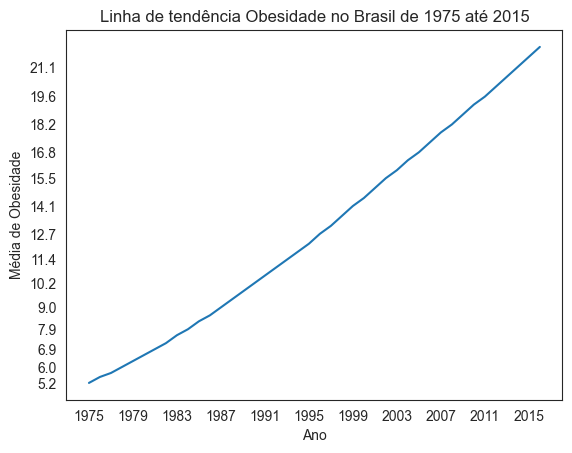

In [296]:
sns.set_style('white')
sns.lineplot(data=dados_gráfico_linha, x='Ano', y='Media_Obesidade')
plt.xlabel('Ano')
plt.xticks(dados_gráfico_linha['Ano'][::4])
plt.ylabel('Média de Obesidade')
plt.yticks(dados_gráfico_linha['Media_Obesidade'][::3])
plt.title('Linha de tendência Obesidade no Brasil de 1975 até 2015')
plt.show()

# Análise Dataset GPD

In [271]:
dados = pd.read_csv(r'C:\Users\alexa\OneDrive\Área de Trabalho\projeto_a3\Dados_PIB\GDP.csv')
dados

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [272]:
dados.describe()

,Country,Region,Year,GDP_pp
count,4419,4419,4419,4419
unique,193,8,23,4387
top,Afghanistan,Europe,1/1/2001,"3,372.76"
freq,23,1063,193,4


In [273]:
dados['Region'].unique()

array(['Middle East, North Africa, and Greater Arabia', 'Europe',
       'Sub-Saharan Africa', 'Central America and the Caribbean',
       'South America', 'Australia and Oceania', 'Asia', 'North America'],
      dtype=object)

In [274]:
dados.isnull()

,Country,Region,Year,GDP_pp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4414,False,False,False,False
4415,False,False,False,False
4416,False,False,False,False
4417,False,False,False,False


In [275]:
dados.dtypes

Country     object
Region      object
Year        object
 GDP_pp     object
dtype: object

In [276]:
gdp_2011 = dados[dados['Year'] == '2011-01-01']
gdp_2011[' GDP_pp ']


Series([], Name:  GDP_pp , dtype: object)

In [277]:
dados['Year'] = pd.to_datetime(dados['Year'], format='%m/%d/%Y')  # Convert 'Year' column to datetime format
dados.set_index('Year', inplace=True)

In [278]:
list_of_countries = dados['Country'].unique()
new_df = pd.DataFrame()

In [279]:
for country in list_of_countries:
    filtered_df = dados[dados['Country'] == country]
    region = filtered_df['Region'].iloc[0]

    if not pd.api.types.is_numeric_dtype(filtered_df[' GDP_pp ']):
        filtered_df[' GDP_pp '] = filtered_df[' GDP_pp '].str.replace('"', '').str.replace(' ', '').str.replace(',', '')
        filtered_df[' GDP_pp '] = pd.to_numeric(filtered_df[' GDP_pp '], errors='coerce')

    filtered_df = filtered_df.resample('Y', closed='left').max()
    filtered_df[' GDP_pp '] = filtered_df[' GDP_pp '].interpolate(method='linear')
    filtered_df['Region'] = region
    filtered_df['Country'] = country
    new_df = pd.concat([new_df, filtered_df])

new_df.index = new_df.index.strftime('%Y')

new_df 

C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2228801988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[' GDP_pp '] = filtered_df[' GDP_pp '].str.replace('"', '').str.replace(' ', '').str.replace(',', '')
C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2228801988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[' GDP_pp '] = pd.to_numeric(filtered_df[' GDP_pp '], errors='coerce')
C:\Users\alexa\AppData\Local\Temp\ipykernel_8244\2228801988.py:9: FutureWarning: 'Y' is depre

,Country,Region,GDP_pp
Year,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",613.990
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",616.000
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",618.010
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",620.020
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",622.030
...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,521.402
2008,Zimbabwe,Sub-Saharan Africa,522.634
2009,Zimbabwe,Sub-Saharan Africa,523.866


In [280]:
increase_rates = {}


new_df.index = pd.to_datetime(new_df.index)

for country in new_df['Country'].unique():
    start_gdp = new_df.loc[(new_df['Country'] == country) & (new_df.index.year == 1901), ' GDP_pp '].values
    end_gdp = new_df.loc[(new_df['Country'] == country) & (new_df.index.year == 2011), ' GDP_pp '].values


    if len(start_gdp) > 0 and len(end_gdp) > 0:
        start_gdp = start_gdp[0]
        end_gdp = end_gdp[0]
        increase_rate = ((end_gdp - start_gdp) / start_gdp) * 100
        increase_rates[country] = increase_rate
    else:
        increase_rates[country] = None


for country, rate in increase_rates.items():
    if rate is not None:
        print(f"{country}: {rate:.2f}%")
    else:
        print(f"No data available for {country} for either 1901 or 2011.")

Afghanistan: 105.43%
Albania: 551.06%
Algeria: 251.52%
Andorra: 843.50%
Angola: 954.98%
Antigua and Barbuda: 1371.79%
Argentina: 331.79%
Armenia: 624.82%
Australia: 578.55%
Austria: 743.30%
Azerbaijan: 874.37%
Bahamas: 779.49%
Bahrain: 1747.84%
Bangladesh: 147.39%
Barbados: 837.87%
Belarus: 1171.30%
Belgium: 641.21%
Belize: 687.45%
Benin: 79.13%
Bhutan: 800.02%
Bolivia: 185.75%
Bosnia and Herzegovina: 1150.97%
Botswana: 2200.59%
Brazil: 1501.14%
Brunei: 3378.83%
Bulgaria: 613.51%
Burkina Faso: 162.73%
Burundi: 30.68%
Cambodia: 172.32%
Cameroon: 171.12%
Canada: 695.32%
Cape Verde: 698.73%
Chad: 194.92%
Chile: 555.09%
China: 868.96%
Colombia: 1127.52%
Comoros: 7.87%
Congo, Rep.: 619.21%
Costa Rica: 537.09%
Cote d'Ivoire: 74.35%
Croatia: 592.08%
Cuba: 233.44%
Cyprus: 1208.87%
Czech Rep.: 583.31%
Denmark: 776.43%
Djibouti: 295.74%
Dominica: 768.37%
Ecuador: 324.79%
Egypt: 365.60%
El Salvador: 267.66%
Equatorial Guinea: 3639.65%
Eritrea: 46.81%
Estonia: 995.94%
Ethiopia: 109.89%
Fiji: 572.7

In [281]:
type(increase_rate)

numpy.float64

In [282]:
len(new_df.isnull())

21323

In [283]:
sorted_increase_rates = sorted(increase_rates.items(), key=lambda x: x[1] if x[1] is not None else float('-inf'), reverse=True)
sorted_increase_rates


[('Qatar', 9337.424817394798),
 ('Kuwait', 3764.2775935130467),
 ('Korea, Rep.', 3721.016306521127),
 ('Equatorial Guinea', 3639.6470200131957),
 ('Greenland', 3637.496015749508),
 ('Saudi Arabia', 3441.3780953589),
 ('Brunei', 3378.827383848212),
 ('Taiwan', 3276.1213993903075),
 ('Liechtenstein', 2361.9196832610114),
 ('Gabon', 2299.7570174802354),
 ('United Arab Emirates', 2231.04814989117),
 ('Botswana', 2200.589876310836),
 ('Luxembourg', 2194.4762167252347),
 ('Singapore', 1964.067599067599),
 ('Israel', 1808.4443818047287),
 ('Bahrain', 1747.8420971709718),
 ('Seychelles', 1745.3912589466352),
 ('Oman', 1720.1726507170292),
 ('Japan', 1625.8412451274069),
 ('Norway', 1620.2420453161392),
 ('Malta', 1550.5837180397727),
 ('Brazil', 1501.1395879595361),
 ('Iceland', 1467.9495177755289),
 ('Antigua and Barbuda', 1371.7873290842729),
 ('Venezuela', 1367.1017084089217),
 ('Trinidad and Tobago', 1348.2976858640511),
 ('Malaysia', 1337.2975586173557),
 ('Finland', 1312.455919563487),
 

Os países que tiveram o maior crescimento foram Qatar com 9.335,42% - Kuwait com 3.764,27% e República da Coréia com 3.721,01%
Os países que tiveram o menor crescimento do seu PIB foi Comoros com 7,87% - Haiti 5,19% - Liberia -13,95%

In [284]:
selected_countries = ['Brazil', 'United States', 'Portugal']
filtered_data = dados[dados['Country'].isin(selected_countries)]

In [285]:
grouped_data = filtered_data.groupby('Country')

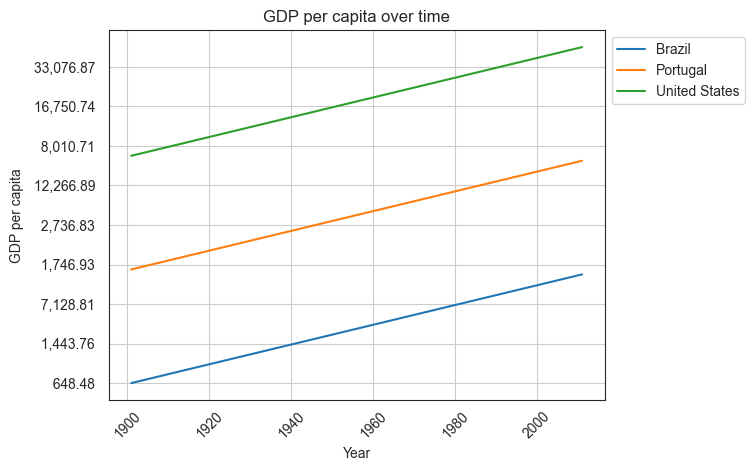

In [286]:
for country, group in grouped_data:
    plt.plot(group.index, group[' GDP_pp '], label=country)

plt.title('GDP per capita over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))

plt.show() 
    

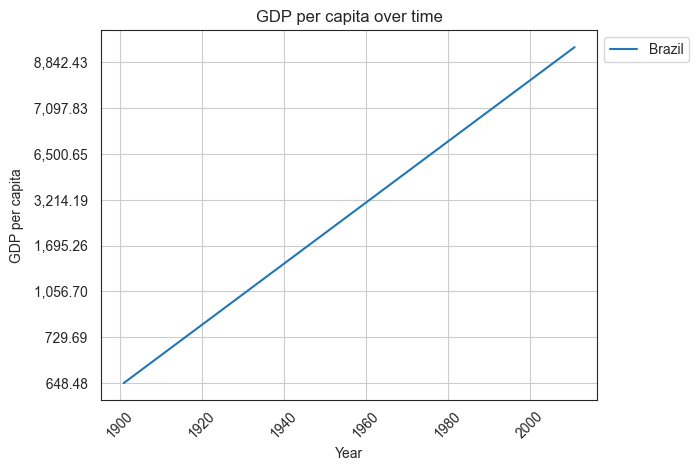

In [294]:
top_3_countries = ['Brazil']
filtered_data = dados[dados['Country'].isin(top_3_countries)]

grouped_data = filtered_data.groupby('Country')

for country, group in grouped_data:
    plt.plot(group.index, group[' GDP_pp '], label=country)

plt.title('GDP per capita over time')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))

plt.show() 

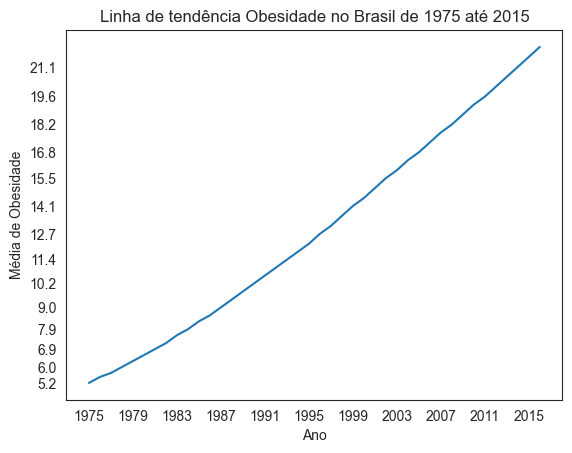

## Os países que tiveram crescimento de PIB teve aumento no índice de pessoas obesas?

O Brasil, por exemplo foi um país que com o crecimento do PIB, houve também um crescimento na taxa de pessoas obesas